In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Paths

# SED folder path
SED_path = './../../../wf-psf/data/SEDs/save_SEDs/'
# Output saving path (in node05 of candide)
output_folder = './../../../../../n05data/ecentofanti/WFE_sampling_test/multires_dataset/'


In [3]:
# Load the SEDs
stellar_SEDs = np.load(SED_path + 'SEDs.npy', allow_pickle=True)
stellar_lambdas = np.load(SED_path + 'lambdas.npy', allow_pickle=True)

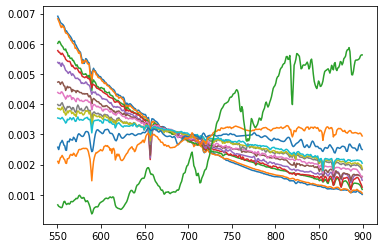

In [10]:
for idx in range(stellar_SEDs.shape[0]):
    plt.plot(stellar_lambdas, stellar_SEDs[idx,:])
    